### Tarea 6.8

Suponga que la medición de un cierto proceso físico da como resultado la siguiente expresión

$$
p(x) = \sin x + n(x)
$$

donde $n$ es el error experimental que podemos describir como un número aleatorio, para cada valor de $x$, tomado de una distribución gaussiana con media $0$ y desviación estándar $10^{-5}$. Queremos calcular la integral

$$
\int_0^1 dx\,p(x)\,.
$$

Use el método compuesto de Simpson para calcular esta integral. El verdadero valor de esta integral es $1-\cos(1)$. Grafique el error cometido en función de $h$. ¿Se puede lograr una precisión de $10^{-7}$? ¿Por qué?

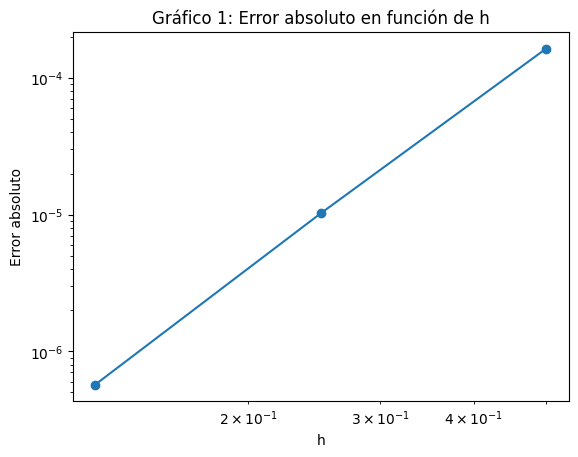

No se puede lograr una precisión de 10^(-7)








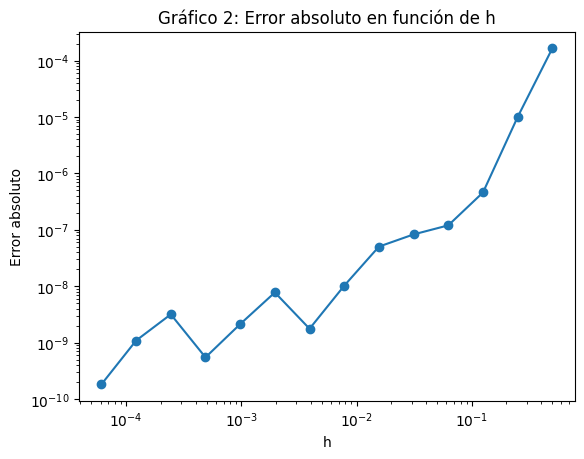

Sí se puede lograr una precisión de 10^(-7)


In [43]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos el método de Simpson compuesto
def metodo_simpson(a, b, h, N = 1000):
    n = int((b - a)/h)
    if n%2 != 0:
      #Si el número de intervalos es impar, se le suma 1 para quedar par
        n += 1
    x = np.linspace(a, b, n+1)
    sumatoria = 0  #Esta variable guardará el valor de la sumatoria

    for _ in range(N):
        n_x = np.random.normal(0, 1e-5, len(x))  #Este es el error experimental
        p_x = np.sin(x) + n_x  # La función p(x) = sin(x) + n(x)
        sumatoria += (h/3)*(p_x[0] + 2*np.sum(p_x[2:-2:2]) + 4*np.sum(p_x[1:-1:2]) + p_x[-1])

    return sumatoria/N  # Entrega el valor promedio, que es el resultado aproximado de la integral


#Ahora haremos dos casos

#Caso 1: Los tamaños de h no son tan pequeños

valores_h1 = [2**-i for i in range(1, 4)]

# Valor verdadero de la integral
valor_real = 1 - np.cos(1)

errores1 = [] #Aquí se guardarán los errores para cada valor de h
for h in valores_h1:
    valor_integral = metodo_simpson(0, 1, h)
    error = abs(valor_integral - valor_real)
    errores1.append(error)

# Graficamos el error absoluto en función de h

plt.loglog(valores_h1, errores1, marker='o')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Gráfico 1: Error absoluto en función de h')
plt.show()

#Finalmente verificamos si se logra una precisión de 10^(-7)

for i in errores1:
  if i < 1e-7:
    t1 = True
    break
  else:
    t1 = False

if t1 == True:
  print("Sí se puede lograr una precisión de 10^(-7)")
else:
  print("No se puede lograr una precisión de 10^(-7)")

print("\n")
print("\n")
print("\n")

#Caso 2: Los tamaños de h son más pequeños. Hacemos el mismo procedimiento

valores_h2 = [2**-j for j in range(1, 15)]

errores2 = []
for h in valores_h2:
    valor_integral = metodo_simpson(0, 1, h)
    error = abs(valor_integral - valor_real)
    errores2.append(error)

plt.loglog(valores_h2, errores2, marker='o')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Gráfico 2: Error absoluto en función de h')
plt.show()

for j in errores2:
  if j < 1e-7:
    t2 = True
    break
  else:
    t2 = False

if t2 == True:
  print("Sí se puede lograr una precisión de 10^(-7)")
else:
  print("No se puede lograr una precisión de 10^(-7)")

Vemos que se puede lograr una precisión de $10^{-7}$ si el tamaño de $h$ es mucho más pequeño.